In [1]:
from bs4 import BeautifulSoup as BS
from bokeh.plotting import figure, show 
import urllib.request
import pandas as pd
import numpy as np
import re as r
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [2]:
# Define URL and datframe
request = urllib.request.Request('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')
result = urllib.request.urlopen(request)
resulttext = result.read()

In [3]:
# pulling data from HTML
soup = BS(resulttext, 'html.parser')

In [4]:
# prettifying the soup
#print(soup.prettify)

In [5]:
# finding particular table in the soup
data = []
table = soup.find('table', "sortable wikitable")

In [6]:
# Iterate through your table, grab each row, and pull the < th > and < td > elements into a dataset
table = table.find_all('tr')
for row in table:
    cells = row.find_all('td')
    cells = [ele.text.strip() for ele in cells]
    data.append(cells)

In [7]:
# Define data frame and its field names and remove and extraneous records
quake_df = pd.DataFrame(data)
quake_df.drop(0, inplace=True)
quake_df = quake_df.rename(columns={0:'Origin', 1:'Country', 2:'Lat', 3:'Long', 4:'Depth', 5:'Magnitude', 6:'Secondary Effects', 7:'PDE_Shaking', 8:'PDE_Total', 9:'Utsu_Total', 10:'EM_DAT_Total', 11: 'Other'})

In [8]:
# Replace empty strings with NaN
quake_df = quake_df.apply(lambda x: x.str.strip()).replace('', np.nan)

In [9]:
# Remove the footnotes from the 'Other Source Deaths' column
quake_df['Other'] = quake_df.Other.str.replace(r'+','')
quake_df['Other'] = quake_df.Other.str.replace(r',','')
quake_df['Other'] = quake_df.Other.str.extract('(\d+)', expand = True)
quake_df['EM_DAT_Total'] = quake_df.EM_DAT_Total.str.extract('(\d+)', expand = True)

In [10]:
# Remove the footnotes from the 'Country' column
quake_df['Country'] = quake_df.Country.str.replace(r'\(.*','')
quake_df['Country'] = quake_df.Country.str.replace(r'\,.+', '')
quake_df['Country'] = quake_df.Country.str.replace(r'\s+$', '')


In [11]:
# convert magnitude to numeric
quake_df['Magnitude'] = quake_df.Magnitude.str.extract('(\d\.\d)', expand = True)

In [12]:
# create the death column
#quake_df[['PDE_Total', 'Utsu_Total', 'EM_DAT_Total', 'Other']] = quake_df[['PDE_Total', 'Utsu_Total', 'EM_DAT_Total', 'Other']].fillna(-1)
quake_df['PDE_Total'] = quake_df['PDE_Total'].astype(float)
quake_df['Utsu_Total'] = quake_df['Utsu_Total'].astype(float)
quake_df['EM_DAT_Total']= quake_df['EM_DAT_Total'].astype(float)
quake_df['Other'] = quake_df['Other'].astype(float)

In [13]:
quake_df['Deaths'] = quake_df[['EM_DAT_Total','Utsu_Total','PDE_Total','Other']].apply(np.max, axis=1)

In [14]:
#quake_df[['EM_DAT_Total','Utsu_Total','PDE_Total','Other', 'Deaths']]=quake_df[['EM_DAT_Total','Utsu_Total','PDE_Total','Other', 'Deaths']].replace(-1.0,np.NaN)
quake_df

,Origin,Country,Lat,Long,Depth,Magnitude,Secondary Effects,PDE_Shaking,PDE_Total,Utsu_Total,EM_DAT_Total,Other,Deaths
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0
6,1901-08-09 09:23,Japan,40.500,142.500,35,7.2,T,NaN,NaN,NaN,NaN,NaN,NaN
7,1901-11-15 20:15,New Zealand,-43.000,173.000,0,6.8,NaN,NaN,NaN,1.0,NaN,NaN,1.0
8,1902-01-30 14:01,Japan,40.500,141.300,35,6.9,NaN,NaN,NaN,1.0,NaN,NaN,1.0
9,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9,NaN,NaN,NaN,86.0,NaN,NaN,86.0
10,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5,NaN,NaN,NaN,4.0,NaN,NaN,4.0


In [15]:
# Importing population density from wikipedia
data = pd.read_html("https://simple.wikipedia.org/wiki/List_of_countries_by_population_density", header = 0)

In [16]:
popdens = pd.DataFrame(data[0])

In [17]:
popdens.columns

Index(['Rank', 'Country / dependent territory', 'Population',
       'Date last updated', 'Area (km2)', 'Area (mi2)', 'Density (/km2)',
       'Density (/mi2)', 'Notes'],
      dtype='object')

In [18]:
# Picking only 2 columns from the dataset
popdens = popdens[['Country / dependent territory', 'Density (/mi2)']]

In [19]:
# making column name consistent with the other dataset
popdens.columns = ['Country', 'Density']
popdens.head()

,Country,Density
0,Macau (China),48003
1,Monaco,43830
2,Singapore,18513
3,Hong Kong (China),16444
4,Gibraltar (UK),11808


In [20]:
#merging with quake_df data to get the density column
# NetmigIntmerge = pd.merge(UNmig1, UNInt1, how = 'inner', on=['Country', 'Year'])
quake_df_dens = pd.merge(quake_df,popdens, how = 'left', on = 'Country' )

In [21]:
quake_df_dens.head()

,Origin,Country,Lat,Long,Depth,Magnitude,Secondary Effects,PDE_Shaking,PDE_Total,Utsu_Total,EM_DAT_Total,Other,Deaths,Density
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,873
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0,241
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0,171


In [22]:
# Making a categorial variable based on magnitude
def severity (value):
    if value >= 6:
        return 'Devastating'
    elif  4 < value < 6:
        return 'Moderate'
    elif 2 < value <= 4 :
        return 'Mild'
    else:
        return 'Minuscle'

In [23]:
quake_df_dens['Magnitude']= quake_df_dens.Magnitude.apply(float)
quake_df_dens['Intensity']= quake_df_dens['Magnitude'].apply(severity)

In [24]:
quake_df_dens.head()

,Origin,Country,Lat,Long,Depth,Magnitude,Secondary Effects,PDE_Shaking,PDE_Total,Utsu_Total,EM_DAT_Total,Other,Deaths,Density,Intensity
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,873,Devastating
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0,241,Moderate
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91,Devastating
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373,Devastating
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0,171,Devastating


In [25]:
# making density column as float
quake_df_dens['Density'] = quake_df_dens['Density'].astype(float)

In [26]:
# making a density function
def dens (value):
    if value >= 750:
        return 'Huge'
    elif  500 < value < 750:
        return 'Bearable'
    elif 250 < value <= 500 :
        return 'Easy'
    else:
        return 'Sparse'

In [27]:
 quake_df_dens['Density_cat']= quake_df_dens['Density'].apply(dens)

In [28]:
quake_df_dens.head()

,Origin,Country,Lat,Long,Depth,Magnitude,Secondary Effects,PDE_Shaking,PDE_Total,Utsu_Total,EM_DAT_Total,Other,Deaths,Density,Intensity,Density_cat
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,873.0,Devastating,Huge
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0,241.0,Moderate,Sparse
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,Devastating,Sparse
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.0,Devastating,Easy
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0,171.0,Devastating,Sparse


In [29]:
# looking for the effect of Intensity and Density on deaths
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

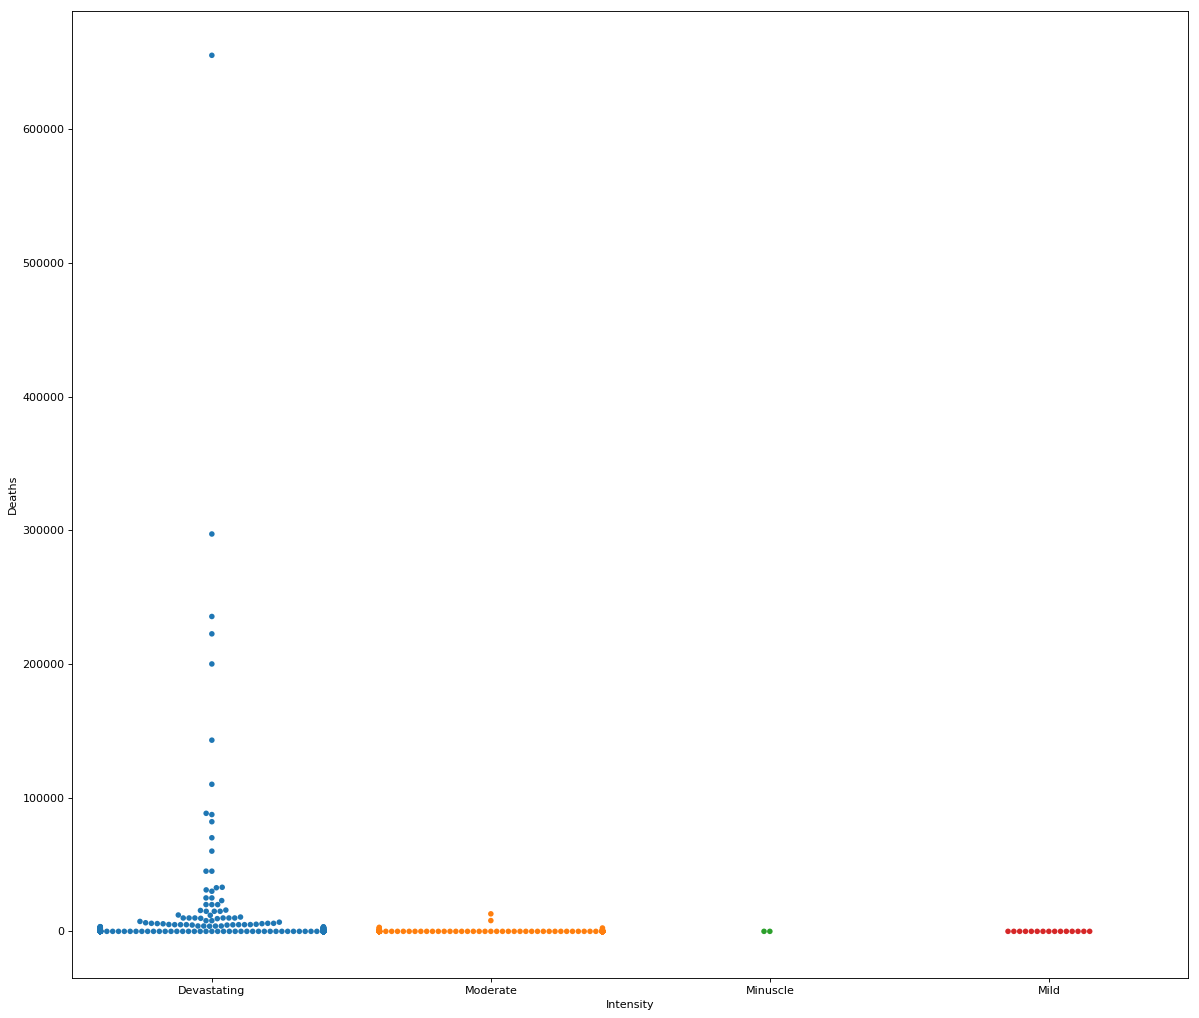

In [30]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sns.swarmplot(x='Intensity', y= 'Deaths', data = quake_df_dens)

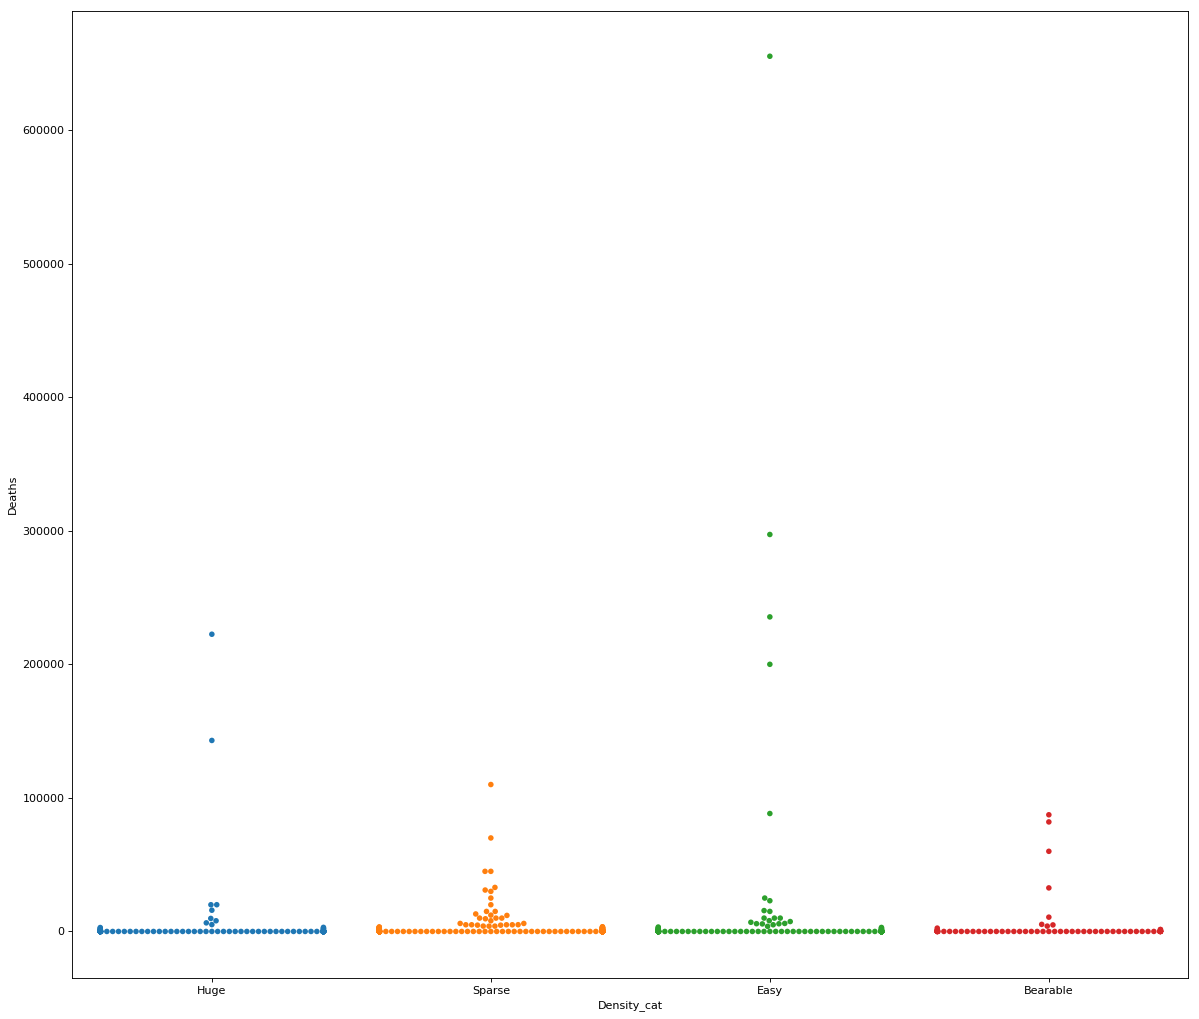

In [31]:
# looking for the effect of Intensity and Density on deaths
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sns.swarmplot(x='Density_cat', y= 'Deaths', data = quake_df_dens)

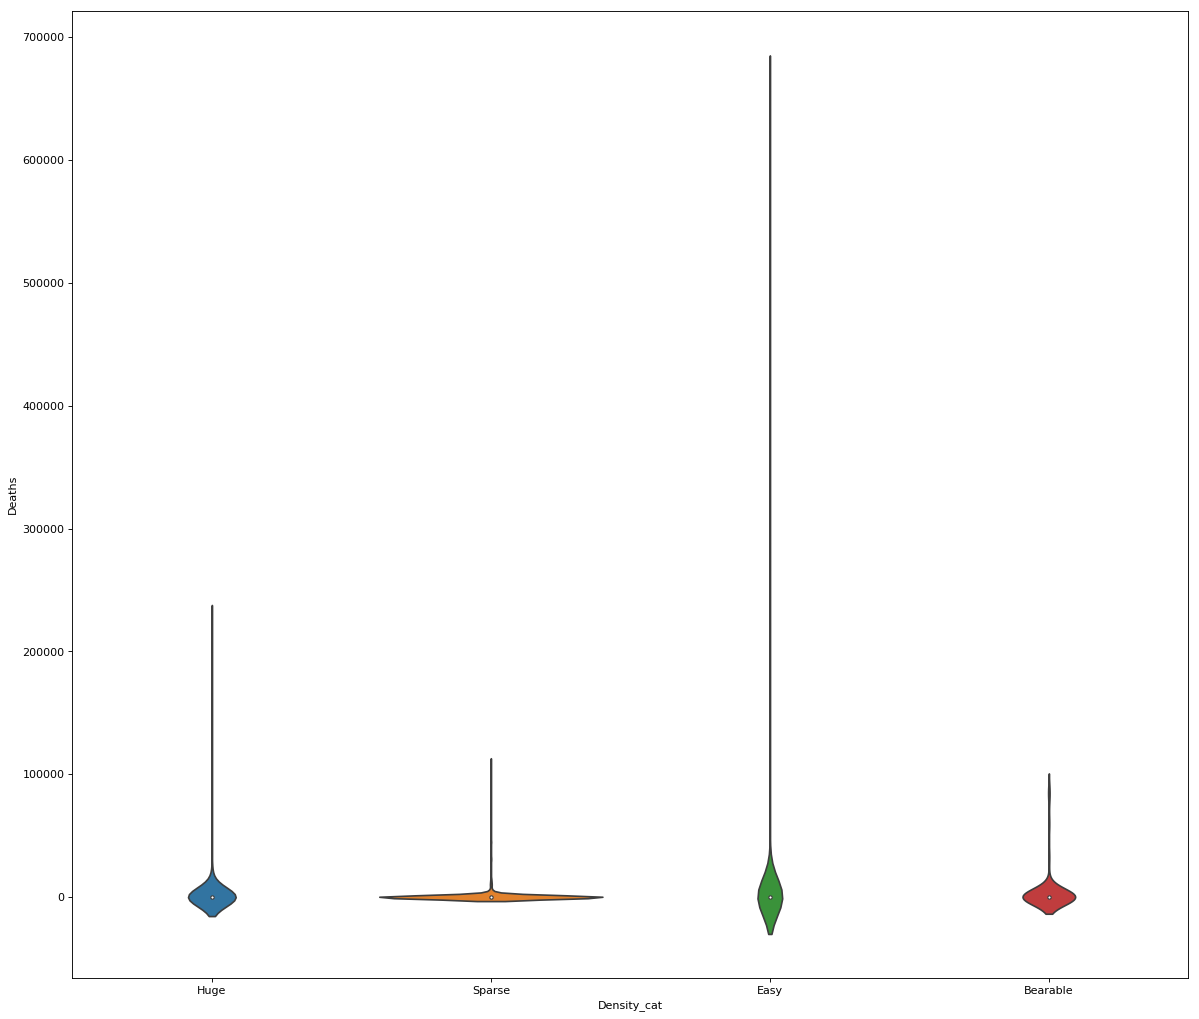

In [32]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sns.violinplot(x='Density_cat', y= 'Deaths', data = quake_df_dens)

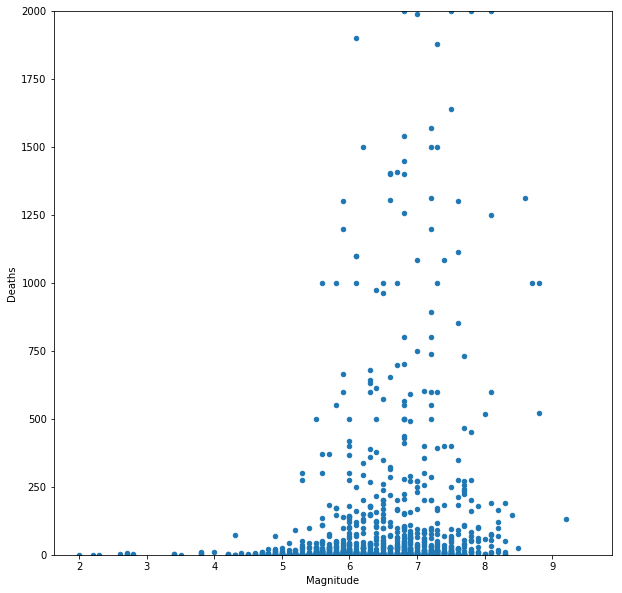

In [33]:
quake_df_dens.plot(kind="scatter",     # Create a scatterplot
              x='Magnitude',          # Put carat on the x axis
              y='Deaths',          # Put price on the y axis
              figsize=(10,10),
              ylim=(0,2000))  


from bokeh.io import output_file, show
plot = figure()
plot.circle(quake_df_dens['Magnitude'], quake_df['Deaths'], size =10)
output_file('magdeath.html')
show(plot)


plot = figure()
plot.circle(quake_df_dens['Density'], quake_df_dens['Deaths'], size =10)
output_file('magdeath1.html')
show(plot)



In [34]:
# importing the GDP data
GDPCtry = pd.read_excel('/Users/mac/Desktop/NSS/IMFGDP2017.xlsx')

In [35]:
GDPdf = pd.DataFrame(GDPCtry)

In [36]:
GDPdf.head()

,Country,GDP
0,Afghanistan,572.163
1,Albania,4520.268
2,Algeria,4225.004
3,Angola,4401.432
4,Antigua and Barbuda,16826.192


In [37]:
GDPdf.columns

Index(['Country', 'GDP'], dtype='object')

In [38]:
# merging GDP data with the data frame
quake_df_dens_GDP = pd.merge(quake_df_dens,GDPdf, how = 'left', on = 'Country' )

In [39]:
# quake_df_dens_GDP

In [40]:
quake_df_dens_GDP['GDP'] = quake_df_dens_GDP['GDP'].astype(float)

In [41]:
# making a GDP function
def Gross (value):
    if value >= 50000:
        return 'Very_rich'
    elif  25000 < value < 50000:
        return 'Rich'
    elif 10000 < value <= 25000 :
        return 'Developing'
    else:
        return 'Poor'

In [42]:
 quake_df_dens_GDP['GDP_cat']= quake_df_dens_GDP['GDP'].apply(Gross)

In [43]:
quake_df_dens_GDP.head()

,Origin,Country,Lat,Long,Depth,Magnitude,Secondary Effects,PDE_Shaking,PDE_Total,Utsu_Total,EM_DAT_Total,Other,Deaths,Density,Intensity,Density_cat,GDP,GDP_cat
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,873.0,Devastating,Huge,38550.089,Rich
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0,241.0,Moderate,Sparse,10434.023,Developing
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,Devastating,Sparse,6850.121,Poor
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.0,Devastating,Easy,8582.940,Poor
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0,171.0,Devastating,Sparse,7923.967,Poor


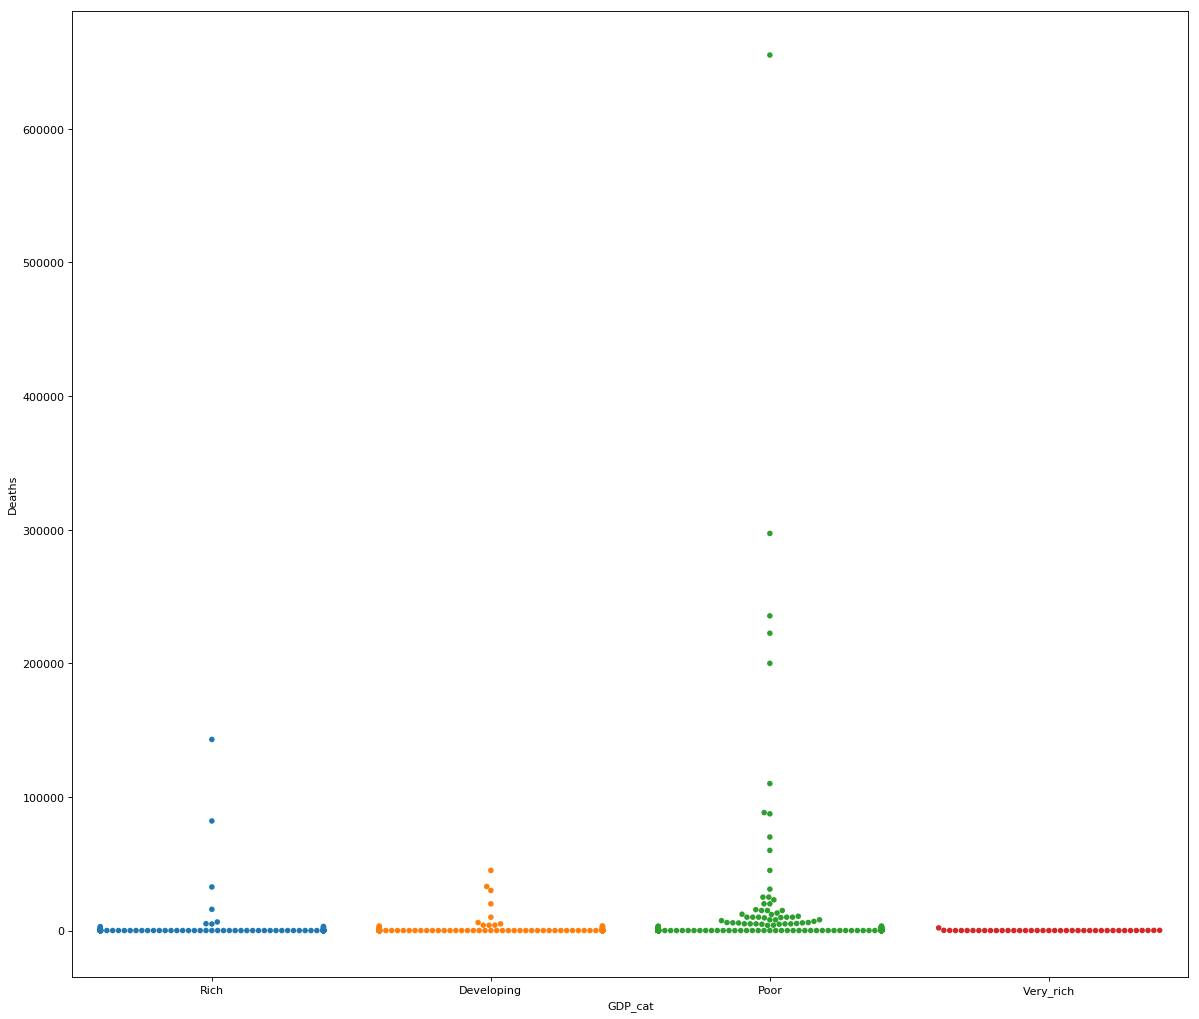

In [44]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sns.swarmplot(x='GDP_cat', y= 'Deaths', data = quake_df_dens_GDP)

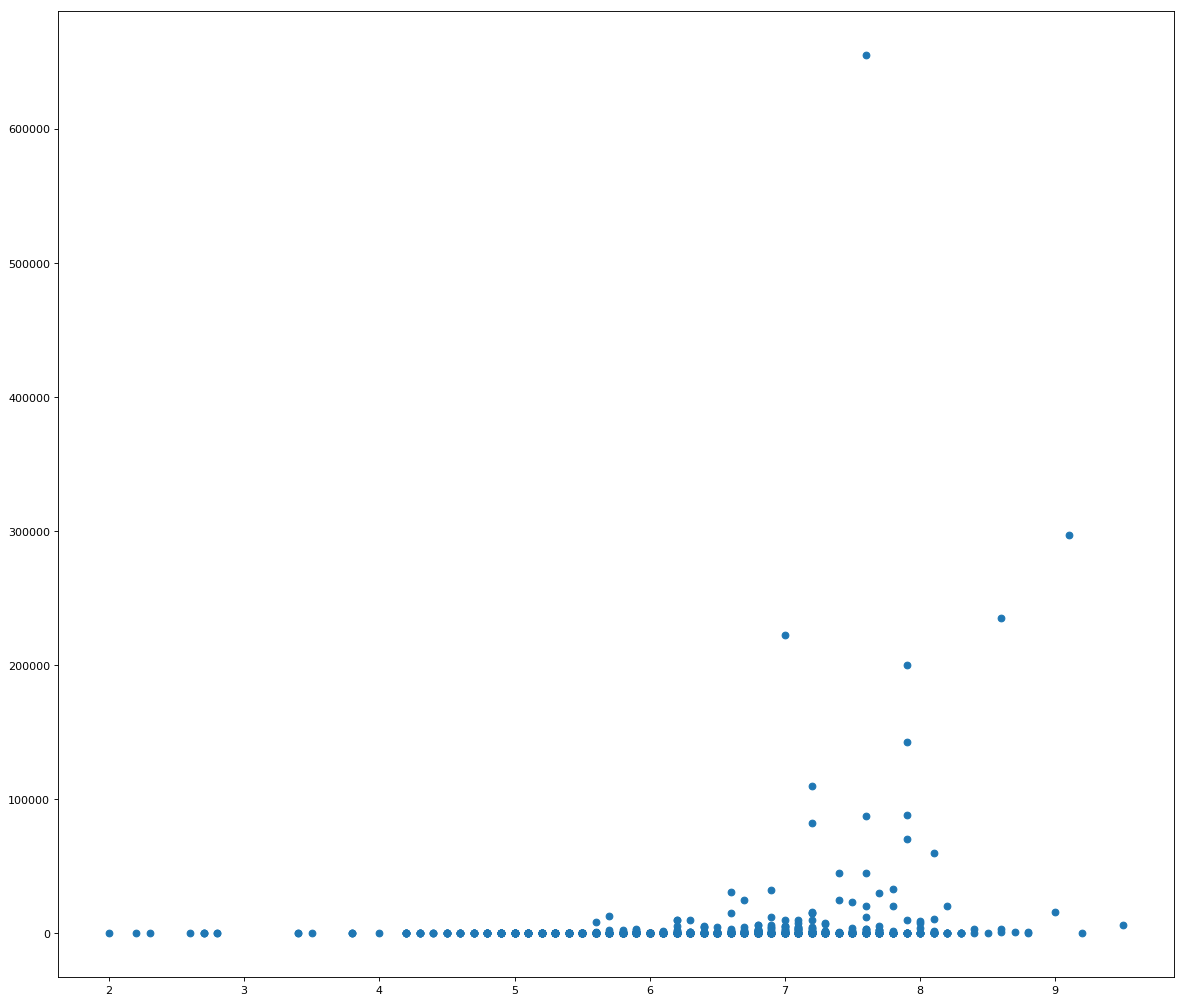

In [45]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(quake_df_dens_GDP.Magnitude, quake_df_dens_GDP.Deaths)

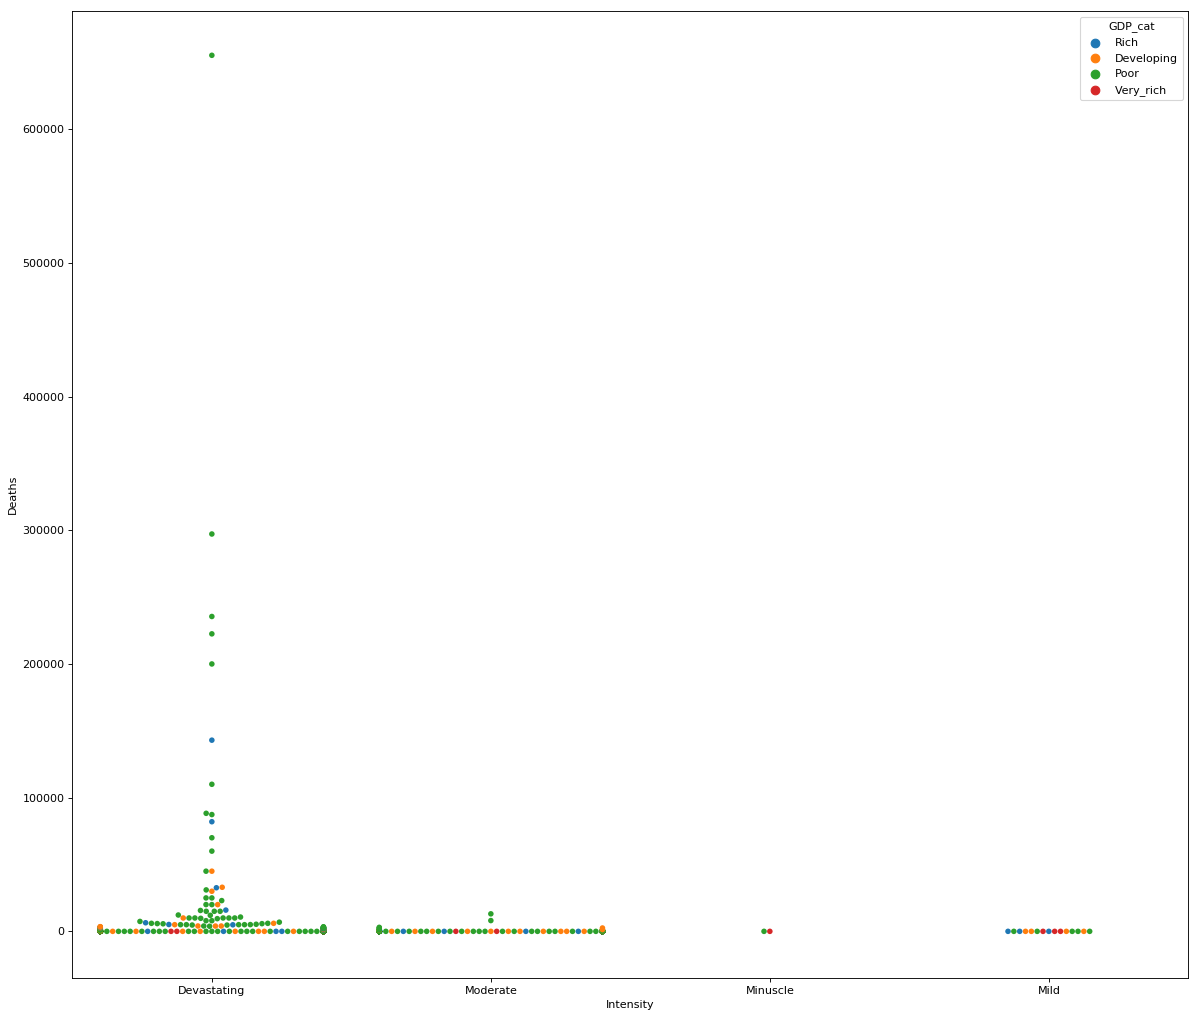

In [46]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sns.swarmplot(x='Intensity', y= 'Deaths', hue = 'GDP_cat',data = quake_df_dens_GDP)

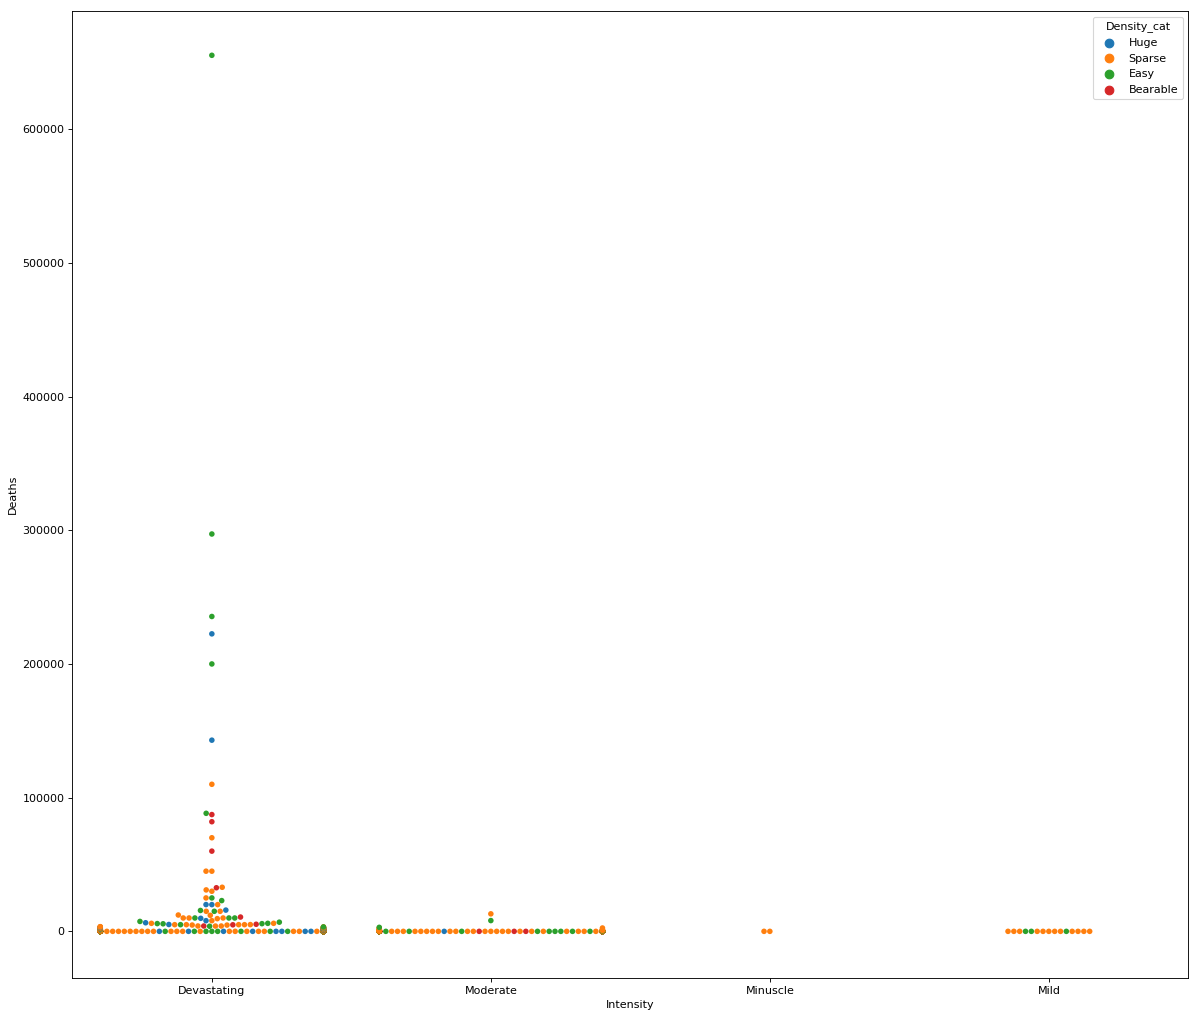

In [47]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sns.swarmplot(x='Intensity', y= 'Deaths', hue = 'Density_cat',data = quake_df_dens_GDP)

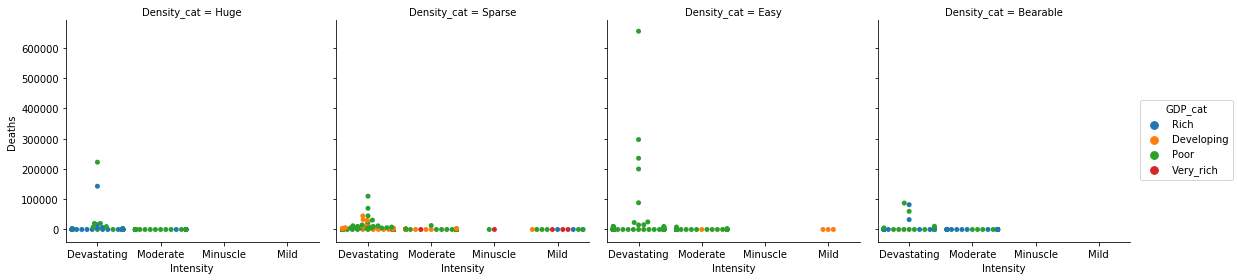

In [48]:
fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.factorplot(x="Intensity", y="Deaths", hue="GDP_cat", col="Density_cat", data=quake_df_dens_GDP, kind="swarm")

In [49]:
from bokeh.io import output_file, show
from bokeh.models import (
  GMapPlot, GMapOptions, ColumnDataSource, Circle, Range1d, PanTool, WheelZoomTool, BoxSelectTool
)

source = ColumnDataSource(quake_df_dens_GDP)

circle = Circle(x="Long", y="Lat", size=15, fill_color="blue", fill_alpha=0.8, line_color=None)
plot.add_glyph(source, circle)

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())
output_file("gmap_plot.html")
show(plot)

In [51]:
# Making date time object out of origin
quake_df_dens_GDP['Year'] = pd.DatetimeIndex(quake_df_dens_GDP['Origin']).year
quake_df_dens_GDP.head()

,Origin,Country,Lat,Long,Depth,Magnitude,Secondary Effects,PDE_Shaking,PDE_Total,Utsu_Total,EM_DAT_Total,Other,Deaths,Density,Intensity,Density_cat,GDP,GDP_cat,Year
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,873.0,Devastating,Huge,38550.089,Rich,1900
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0,241.0,Moderate,Sparse,10434.023,Developing,1900
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,Devastating,Sparse,6850.121,Poor,1900
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.0,Devastating,Easy,8582.940,Poor,1901
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0,171.0,Devastating,Sparse,7923.967,Poor,1901


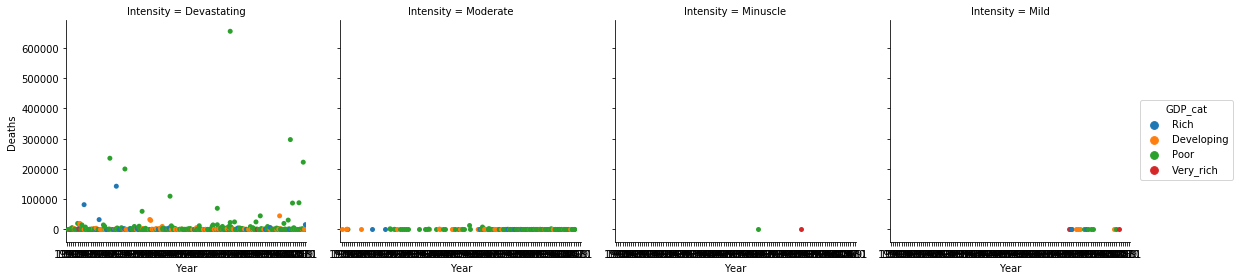

In [52]:
fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.factorplot(x="Year", y="Deaths", hue="GDP_cat", col="Intensity", data=quake_df_dens_GDP, kind="swarm")

m = Basemap(projection = ‘mill’, llcrnrlat = -90, urcrnrlat = 90, llcrnrlon=-180, urcrnrlon=180, resolution=‘h’) #C for crude, l for lower for US llgrnrlat = -60
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color = ‘#04bA3’, lake_color =‘#FFFFFF’)
m.drawmapboundary(fill_color = ‘#FFFFFF’)
plt.title(‘hbjs’)
x,y = m(lon, lat)
m.plot(x,y, ‘r0’, markersize =10, alpha = 0.5)
plt.show()

In [53]:
quake_df_dens_GDP['Long'] = quake_df_dens_GDP['Long'].str.replace('?', '')
quake_df_dens_GDP['Long'] = quake_df_dens_GDP['Long'].astype(str)
quake_df_dens_GDP['Long'] = quake_df_dens_GDP['Long'].apply(lambda x: x.strip()).replace('', np.nan)

#quake_df_dens_GDP['Lat'] = quake_df_dens_GDP['Lat'].str.replace('??', '')

In [54]:
quake_df_dens_GDP['Lat'] = quake_df_dens_GDP['Lat'].astype(str)
quake_df_dens_GDP['Lat'] = quake_df_dens_GDP['Lat'].str.replace('?', '')
quake_df_dens_GDP['Lat'] = quake_df_dens_GDP['Lat'].str.replace('?', '')
quake_df_dens_GDP['Lat'] = quake_df_dens_GDP['Lat'].apply(lambda x: x.strip()).replace('', np.nan)

In [55]:
# making a list for lattitude and longitude
quake_df_dens_GDP['Long'] = quake_df_dens_GDP['Long'].astype(float)
quake_df_dens_GDP['Lat'] = quake_df_dens_GDP['Lat'].astype(float)
lon = quake_df_dens_GDP['Long'].tolist()
lat = quake_df_dens_GDP['Lat'].tolist()

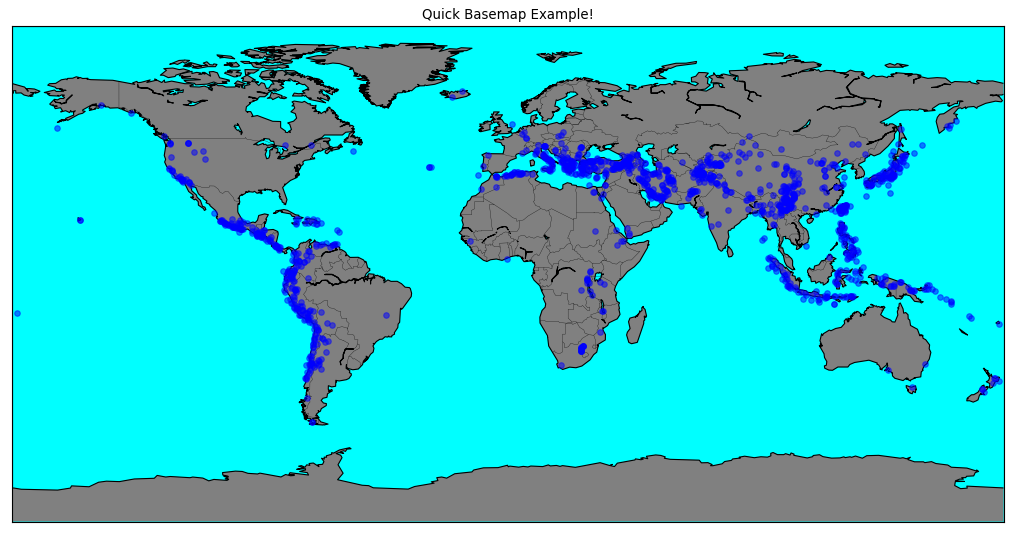

In [56]:
fig=plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')

m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,
            llcrnrlon=-180,urcrnrlon=180,resolution='c')

m.drawcountries(linewidth=0.25)
m.drawcoastlines()
m.fillcontinents(color='grey',lake_color='aqua')

m.drawmapboundary(fill_color='aqua')
x,y = m(lon,lat)
m.plot(x,y, 'bo', markersize=5, alpha = 0.5)
       
plt.title("Quick Basemap Example!")
plt.show()              

In [57]:
size = quake_df_dens_GDP['Magnitude'].values
#for cell in quake_df_dens_GDP['Deaths']:
   # value = cell
   # size.append(value)

In [58]:

print(type(size))

<class 'numpy.ndarray'>


AttributeError: Unknown property s

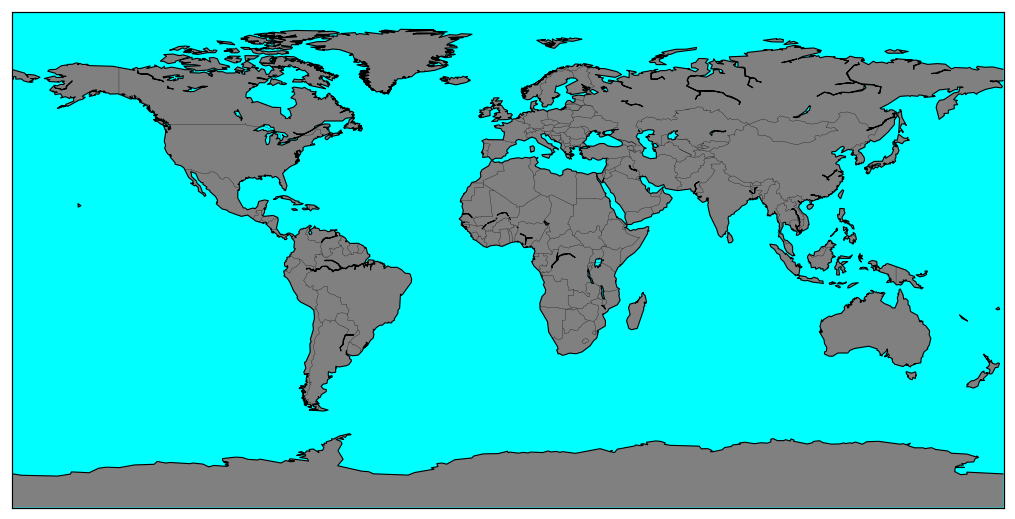

In [59]:
fig=plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')

m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,
            llcrnrlon=-180,urcrnrlon=180,resolution='c')

m.drawcountries(linewidth=0.25)
m.drawcoastlines()
m.fillcontinents(color='grey',lake_color='aqua')

m.drawmapboundary(fill_color='aqua')
x,y = m(lon,lat)

m.plot(x,y, 'bo',s = size, alpha = 0.5)
       
plt.title("Quick Basemap Example!")
plt.show()     

In [ ]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5)

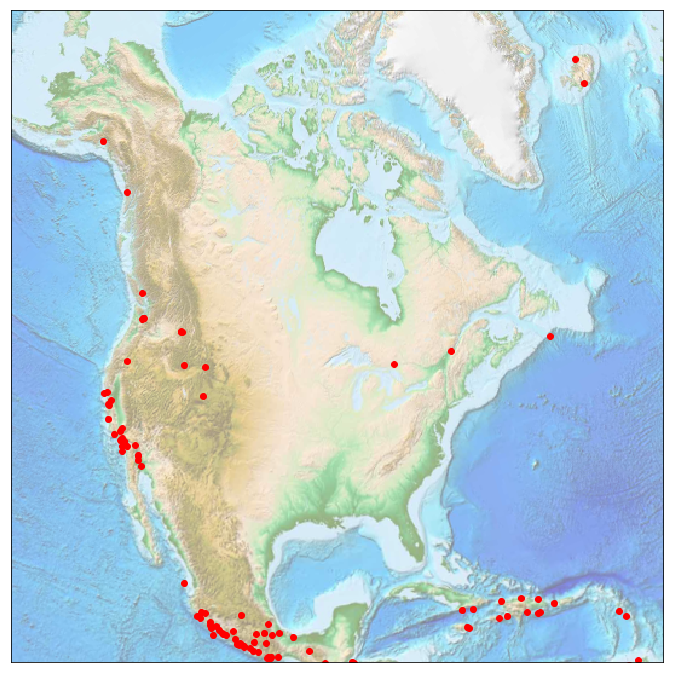

In [60]:
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=50, lon_0=-90,)
m.etopo(scale=0.5, alpha=0.5)
x,y = m(lon,lat)
m.plot(x,y, 'ro')

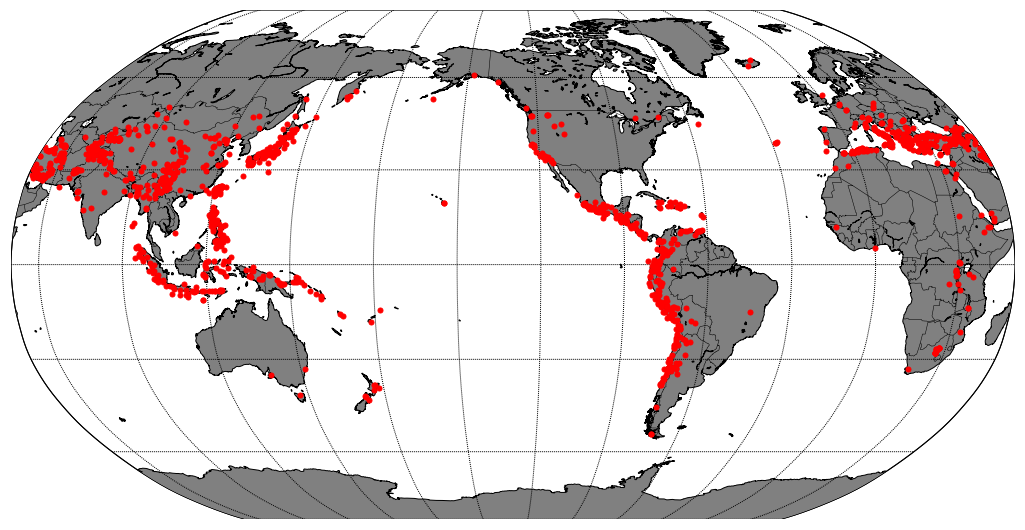

In [61]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(18, 12)) 
m = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color = 'gray')
m.drawmapboundary()
m.drawmeridians(np.arange(0, 360, 30))
m.drawparallels(np.arange(-90, 90, 30))
#deat_size = quake_df_dens_GDP['Deaths'].tolist()
x,y = m(lon, lat)
m.plot(x, y, 'ro', markersize=5)
 
plt.show()

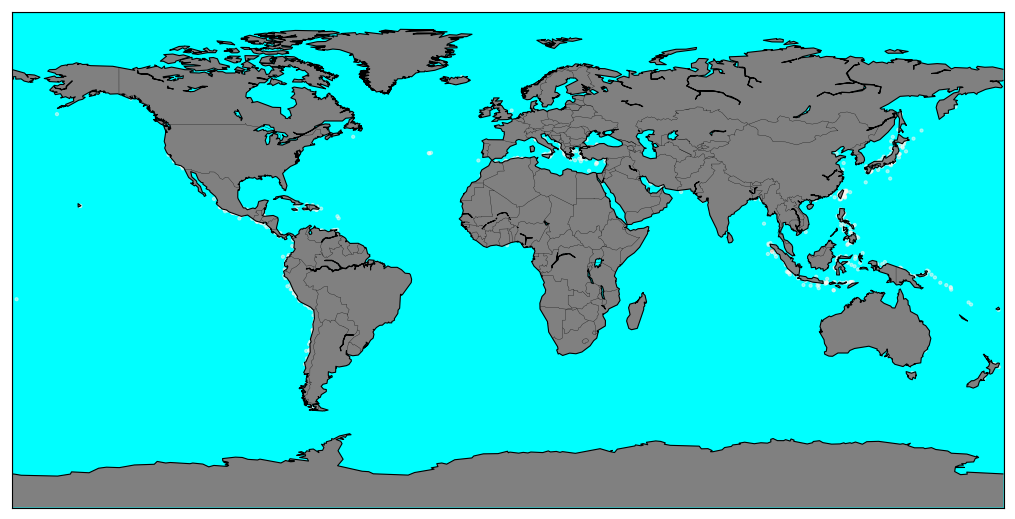

In [62]:
fig=plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')

m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,
            llcrnrlon=-180,urcrnrlon=180,resolution='c')

m.drawcountries(linewidth=0.25)
m.drawcoastlines()
m.fillcontinents(color='grey',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.scatter(lon, lat, latlon=False,
         c=quake_df_dens_GDP.Deaths, s=8,
          cmap='Reds', alpha=0.5)

In [ ]:
# to see the relationship between 

In [64]:
from bokeh.io import output_file, show
from bokeh.plotting import ColumnDataSource, figure
from bokeh.models import CategoricalColorMapper, HoverTool

In [95]:
output_file('quake.html')
column_quake_data = ColumnDataSource(quake_df_dens_GDP)
color_mapper = CategoricalColorMapper(factors=['Very_rich', 'Rich', 'Developing', 'Poor'], palette = ['green', 'cyan', 
                                                                                                      'brown', 'red'])
plot = figure(x_axis_label = 'Magnitude', y_axis_label = 'Deaths', tools='pan, wheel_zoom, box_zoom, reset, hover, save',
            title = 'Mag vs Deaths' )
plot.diamond(x='Magnitude', y = 'Deaths', source = column_quake_data, size = 10, color = dict(field='GDP_cat',
                                                                                              transform = color_mapper ),legend = 'GDP_cat')
plot.legend.location= 'top_left'
plot.legend.background_fill_color = 'lightgrey'
hover = plot.select_one(HoverTool)
hover.tooltips = [('Country', '@Country'),('Year', '@Year'),('Magnitude', '@Magnitude'), ('Casualities', '@Deaths')  ]
show(plot)

In [96]:
output_file('quake1.html')
column_quake_data = ColumnDataSource(quake_df_dens_GDP)
color_mapper = CategoricalColorMapper(factors=['Very_rich', 'Rich', 'Developing', 'Poor'], palette = ['green', 'cyan', 
                                                                                                      'brown', 'red'])
plot = figure(x_axis_label = 'Magnitude', y_axis_label = 'Deaths', tools='pan, wheel_zoom, box_zoom, reset, hover, save',
            title = 'Mag vs Deaths' )
plot.patches(xs = lon, ys = lat, source = column_quake_data )
plot.circle(x='Magnitude', y = 'Deaths', source = column_quake_data, size = 15, color = dict(field='GDP_cat',transform = color_mapper)
            ,legend = 'GDP_cat')
                                                                                              
plot.legend.location= 'top_left'
plot.legend.background_fill_color = 'lightgrey'
hover = plot.select_one(HoverTool)
hover.tooltips = [('Country', '@Country'),('Year', '@Year'),('Magnitude', '@Magnitude'), ('Casualities', '@Deaths')  ]
show(plot)

/Users/mac/anaconda3/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/mac/anaconda3/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
